In [1]:
import pymatgen as pym
from pymatgen import MPRester

"""The above will not be used in this particular notebook per se, but it was included as it was used to 
generate band gap data from the Materials API, and was also used to calculate the features.
"""

import numpy as np
import pandas as pd



In [2]:
#Classic importing section

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn import linear_model

In [3]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.model_selection import KFold

In [4]:

from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, RidgeCV

from sklearn import metrics
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from sklearn 

In [5]:
#Importing the data.


data = pd.read_csv('binary_compounds.csv')

In [14]:
#Some data processing:


df_wcut = data[data['molec_weight']<1000]   #Removing any very heavy chemical compounds


df_ecut = df_wcut[df_wcut['eneg_diff']<10]  

#Considering only molecules with relatively small electronegativity differences


df = df_ecut.drop_duplicates(subset=['pretty_formula'])  

"""Removing any duplicate molecules. Originally tried, using all 700+, duplicates included... 
but that gave very low scores for both
"""

df

,Unnamed: 0,pretty_formula,band_gap,comp,eneg_diff,atom_frac,molec_weight,group_num
0,0,BN,5.6697,B1 N1,1.00,0.50,24.817700,13
1,1,TlN,0.0000,Tl1 N1,1.42,0.50,218.390000,13
3,3,GaN,0.0000,Ga1 N1,1.23,0.50,83.729700,13
7,7,AlN,3.4683,Al1 N1,1.43,0.50,40.988239,13
18,18,InN,0.4777,In1 N1,1.26,0.50,128.824700,13
...,...,...,...,...,...,...,...,...
713,713,Sn3Te,0.0000,Sn3 Te1,3.78,0.75,483.730000,14
714,714,TePb3,0.0000,Te1 Pb3,4.89,0.25,749.200000,16
717,717,SnTe3,0.0000,Sn1 Te3,4.34,0.25,501.510000,14
719,719,SnTe,0.6624,Sn1 Te1,0.14,0.50,246.310000,14


In [15]:
features = df[['eneg_diff','atom_frac','molec_weight','group_num']] #defining the features data frame
 
features

,eneg_diff,atom_frac,molec_weight,group_num
0,1.00,0.50,24.817700,13
1,1.42,0.50,218.390000,13
3,1.23,0.50,83.729700,13
7,1.43,0.50,40.988239,13
18,1.26,0.50,128.824700,13
...,...,...,...,...
713,3.78,0.75,483.730000,14
714,4.89,0.25,749.200000,16
717,4.34,0.25,501.510000,14
719,0.14,0.50,246.310000,14


In [16]:
target = df['band_gap']  #defining the band gap data as the target

target

0      5.6697
1      0.0000
3      0.0000
7      3.4683
18     0.4777
        ...  
713    0.0000
714    0.0000
717    0.0000
719    0.6624
720    0.0000
Name: band_gap, Length: 183, dtype: float64

#### First, let's visualize the data.

Here I make 3 graphs, to see if there is any noticeable trend when comparing band gaps to the Electronegativity Difference, the Molecular Weight, and the Atomic Fraction.

In [17]:
y = target

y

0      5.6697
1      0.0000
3      0.0000
7      3.4683
18     0.4777
        ...  
713    0.0000
714    0.0000
717    0.0000
719    0.6624
720    0.0000
Name: band_gap, Length: 183, dtype: float64

In [18]:


x1 = features['eneg_diff'].to_numpy()

x2 = features['atom_frac'].to_numpy()

x3 = features['molec_weight'].to_numpy()



Text(0, 0.5, 'Band Gap')

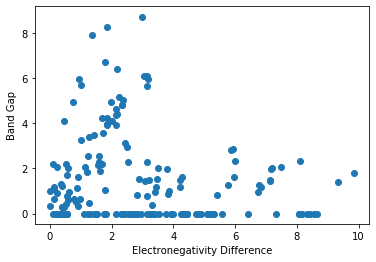

In [19]:
#A graph examining the relationship between the electronegativty difference and the band gap


figure_one = plt.scatter(x1, y) 
plt.xlabel('Electronegativity Difference')
plt.ylabel('Band Gap') 


Text(0, 0.5, 'Band Gap')

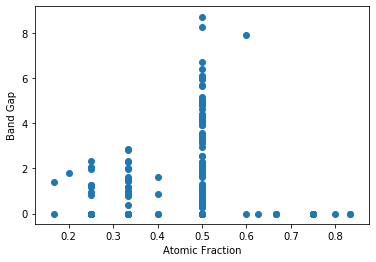

In [20]:
#A graph examining the relationship between the atomic fraction of the cation and the band gap


figure_two = plt.scatter(x2, y) 
plt.xlabel('Atomic Fraction')
plt.ylabel('Band Gap') 


In [ ]:
#A graph examining the relationship between the molecular weight of the compound and the band gap


figure_three = plt.scatter(x3, y) 
plt.xlabel('Molecular Weight')
plt.ylabel('Band Gap')


#### First, we will try to see how a RidgeRegression model performs

While playing around, I also used the Linear Regression without Regularization, but it certainly didn't do too strongly.

In [21]:
model = RidgeCV()

In [22]:
cv = KFold(n_splits=5, shuffle = True, random_state=10)

In [25]:
scores = cross_validate(model, features, target, cv = cv, return_train_score = True)

scores

{'fit_time': array([0.00399041, 0.00498581, 0.00398993, 0.00395679, 0.00298619]),
 'score_time': array([0.00199461, 0.00199413, 0.00099659, 0.00199556, 0.00099945]),
 'test_score': array([0.36974692, 0.29593865, 0.53236762, 0.22267275, 0.34149903]),
 'train_score': array([0.41692426, 0.41719967, 0.3791842 , 0.44244848, 0.40454511])}

In [26]:
print('{:.3f}'.format(scores['test_score'].mean()), '{:.3f}'.format(scores['test_score'].std()))
print('{:.3f}'.format(scores['train_score'].mean()), '{:.3f}'.format(scores['train_score'].std()))

0.352 0.103
0.412 0.021


Clearly, a very high bias issue. To see whether or not adding more data would be beneficial, it is useful to plot a learning curve.

In [31]:
'''Obtaining data, for the learning curve, by examining the model beginning with 1/5th of the data 
and increasing the size by another 1/5th.
'''

size = np.shape(features)

test_data = pd.DataFrame(columns = ('test_score','train_score'))

for i in range(1,6):
    per_feat = round(i/5*size[0])

    scores = cross_validate(model, features.iloc[:per_feat,:], target[:per_feat], cv = cv, return_train_score = True)
    
    df2 = pd.DataFrame([[scores['test_score'].mean(), scores['train_score'].mean()]],columns = ('test_score','train_score'))
        
    test_data = test_data.append(df2, ignore_index = True)
    

test_data

,test_score,train_score
0,-0.253761,0.178318
1,0.336597,0.368044
2,0.328913,0.351448
3,0.297636,0.389622
4,0.352445,0.412060


In [34]:
test_scores = test_data['test_score']

test_scores



0   -0.253761
1    0.336597
2    0.328913
3    0.297636
4    0.352445
Name: test_score, dtype: float64

In [33]:
train_scores = test_data['train_score']

train_scores

0    0.178318
1    0.368044
2    0.351448
3    0.389622
4    0.412060
Name: train_score, dtype: float64

Text(0.5, 1.0, 'Learning Curve')

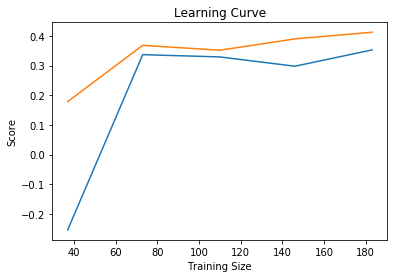

In [43]:
#Plotting the learning curve


x = np.array([round(1/5*size[0]), round(2/5*size[0]), round(3/5*size[0]), round(4/5*size[0]), size[0]])

y1 = test_scores
y2 = train_scores

plt.plot(x, y1, label = 'Test Scores')
plt.plot(x, y2, label = 'Training Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')

In [36]:
from sklearn.preprocessing import StandardScaler , RobustScaler

As can see from the graph above, it doesn't appear that adding data may necessarily help. However, to match the paper, which used 4096 compounds, perhaps more would give a better picture.

In spite of this, in the paper, they also happened to scale some of the features.

#### Now let's try a more powerful method, the Random Forest

In [53]:
model = RandomForestRegressor()

In [54]:
scores = cross_validate(model, features, target , cv = cv, return_train_score=True)

scores

{'fit_time': array([0.12144947, 0.10971832, 0.11264896, 0.10776067, 0.09773684]),
 'score_time': array([0.00698113, 0.00598311, 0.00702429, 0.00597262, 0.00599241]),
 'test_score': array([0.69552454, 0.58445841, 0.8874252 , 0.70898738, 0.72534871]),
 'train_score': array([0.96463456, 0.95983126, 0.96236467, 0.96594984, 0.96056479])}

In [55]:
np.mean(scores['test_score']), np.mean(scores['train_score'])

(0.720348846226546, 0.9626690218610457)

The model seems to perform much better as compared to the Linear Model. However, there is now a variance issue that must be taken care of. Like before, let's see how the learning curve looks.

In [45]:
#same as prior

test_data = pd.DataFrame(columns = ('test_score','train_score'))

for i in range(1,6):
    per_feat = round(i/5*size[0])

    scores = cross_validate(model, features.iloc[:per_feat,:], target[:per_feat], cv = cv, return_train_score = True)
    
    df2 = pd.DataFrame([[scores['test_score'].mean(), scores['train_score'].mean()]],columns = ('test_score','train_score'))
        
    test_data = test_data.append(df2, ignore_index = True)
    

test_data

,test_score,train_score
0,0.485289,0.905163
1,0.470413,0.940884
2,0.231276,0.935591
3,0.669536,0.958989
4,0.716763,0.962224


In [46]:
test_scores = test_data['test_score']

train_scores = test_data['train_score']


Text(0.5, 1.0, 'Learning Curve')

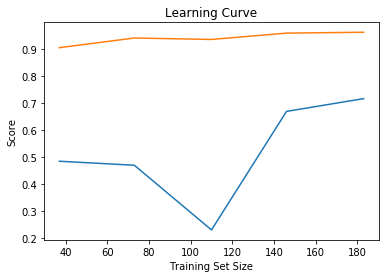

In [48]:
#Plotting the learning curve


x = np.array([round(1/5*size[0]), round(2/5*size[0]), round(3/5*size[0]), round(4/5*size[0]), size[0]])

y1 = test_scores
y2 = train_scores

plt.plot(x, y1, label = 'Test Scores')
plt.plot(x, y2, label = 'Training Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')

There is a strange dip when the size of the training data is about 3/5th of the overall amount of samples. Despite this, there seems to be a general trend of the score improving as more data is added.

Now let's examine the parameters themselves to see if that helps.

In [64]:
#Performing a Grid Search to see if we can obtain the best model. This takes a couple of minutes.



parameters = {'max_depth':[3, 6, None], \
              'max_features':[None,2], 'n_estimators':[50, 100, 200], 'min_samples_leaf': [1,3,5],'min_samples_split': [2,4,6]}
nmodels = np.product([len(el) for el in parameters.values()])
model = GridSearchCV(RandomForestRegressor(random_state = 10), parameters, cv = cv, \
                     verbose = 2, n_jobs = 4, return_train_score=True)
model.fit(features,target)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 300 tasks      | elapsed:   13.5s
[Parallel(n_jobs=4)]: Done 706 tasks      | elapsed:   32.2s


Best params, best score: 0.7441 {'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


[Parallel(n_jobs=4)]: Done 810 out of 810 | elapsed:   37.1s finished


In [66]:
#Checking which set of parameters gave the best model

scores = pd.DataFrame(model.cv_results_)
scoresCV = scores[['params','mean_test_score','std_test_score','mean_train_score']].sort_values(by = 'mean_test_score', \
                                                    ascending = False)

scoresCV

,params,mean_test_score,std_test_score,mean_train_score
136,"{'max_depth': None, 'max_features': 2, 'min_sa...",0.744114,0.080753,0.966130
135,"{'max_depth': None, 'max_features': 2, 'min_sa...",0.740855,0.079909,0.964897
138,"{'max_depth': None, 'max_features': 2, 'min_sa...",0.736206,0.096220,0.942114
139,"{'max_depth': None, 'max_features': 2, 'min_sa...",0.733731,0.091449,0.944712
82,"{'max_depth': 6, 'max_features': 2, 'min_sampl...",0.731210,0.085323,0.929815
...,...,...,...,...
23,"{'max_depth': 3, 'max_features': None, 'min_sa...",0.573607,0.144099,0.732311
26,"{'max_depth': 3, 'max_features': None, 'min_sa...",0.573607,0.144099,0.732311
18,"{'max_depth': 3, 'max_features': None, 'min_sa...",0.570051,0.139797,0.729352
21,"{'max_depth': 3, 'max_features': None, 'min_sa...",0.570051,0.139797,0.729352


In [70]:
#Taking the best model from the grid search done above.

bm = model.best_estimator_

In [71]:
scores = cross_validate(bm, features, target , cv = cv, return_train_score=True)

scores

{'fit_time': array([0.11758876, 0.09473562, 0.09375048, 0.09574437, 0.09375   ]),
 'score_time': array([0.00598025, 0.00598407, 0.00598288, 0.00598454, 0.00694084]),
 'test_score': array([0.66874202, 0.66281451, 0.88605936, 0.75683468, 0.74611814]),
 'train_score': array([0.96882373, 0.96836708, 0.96535962, 0.96466457, 0.96343454])}

In [72]:
np.mean(scores['test_score']), np.mean(scores['train_score'])

(0.7441137422147153, 0.9661299078181175)

Ultimately, there doesn't appear to be too much improvement if any, at least based off of the parameters used.

In [74]:
#same as prior

test_data = pd.DataFrame(columns = ('test_score','train_score'))

for i in range(1,6):
    per_feat = round(i/5*size[0])

    scores = cross_validate(bm, features.iloc[:per_feat,:], target[:per_feat], cv = cv, return_train_score = True)
    
    df2 = pd.DataFrame([[scores['test_score'].mean(), scores['train_score'].mean()]],columns = ('test_score','train_score'))
        
    test_data = test_data.append(df2, ignore_index = True)
    

test_data

,test_score,train_score
0,0.428967,0.923015
1,0.569455,0.946734
2,0.322057,0.940518
3,0.676266,0.963045
4,0.744114,0.966130


In [75]:
test_scores = test_data['test_score']

train_scores = test_data['train_score']


#### References:

1. Natarajan, AS, Varadhan R, Ezhilvel ME. 2016. Band Gap Estimation Using Machine Learning Techniques. Vixra.org

2. J.M.K.C. Donev et al. (2015). Energy Education - Band gap [Online]. Available: https://energyeducation.ca/encyclopedia/Band_gap. 

3. Zhang, Y., Ling C. 2018. A strategy to apply machine learning to small data sets in materials sciences. Nature

4. Ong, S. P.; Cholia, S.; Jain, A.; Brafman, M.; Gunter, D.; Ceder, G.; Persson, K. a. The Materials Application Programming Interface (API): A simple, flexible and efficient API for materials data based on Representational State Transfer (REST) principles, Comput. Mater. Sci., 2015, 97, 209–215. doi:10.1016/j.commatsci.2014.10.037.

5. Some Previous Notebooks